## Leads Scoring Logistic Regression Case Study

##### Problem Statement: 
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


#### Business Goal:- 
Help X education select the most promising leads, i.e. the leads that are most likely to convert into paying customers. Build a model  to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. 

## Step 1: Reading and Understanding the Data

In [2]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

#Let us first import NumPy and Pandas and read the housing dataset
# Importing all required packages
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option("precision",2)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_columns = 50

In [3]:
# Reading the given data set Leads.csv into a data frame leads_df. The data set Leads.csv should be
# placed in the same folder as the ipynb file
lead = pd.read_csv('Data Set/Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [3]:
#Inspecting the dataset
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [4]:
lead.info()
lead.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

(9240, 37)

In [5]:
#Taking a look at the values in dataset
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [6]:
# Analysing data
# Checking columns
print("\nThe various columns are:-\n")
print(lead.columns)

print("\n No. of columns :-",lead.shape[1])


The various columns are:-

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
     

In [7]:
#Replacing the space in column names with '_'
lead.columns = lead.columns.str.strip().str.replace(' ', '_')

## Step 2: Data Analysis and Cleaning

#### Dropping Columns unimportant for our Analysis

In [8]:
# Inspecting if any of the columns has only one unique value

lead.nunique(axis=0)

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                      5   
Lead_Source                                      21  
Do_Not_Email                                     2   
Do_Not_Call                                      2   
Converted                                        2   
TotalVisits                                      41  
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                             114 
Last_Activity                                    17  
Country                                          38  
Specialization                                   19  
How_did_you_hear_about_X_Education               10  
What_is_your_current_occupation                  6   
What_matters_most_to_you_in_choosing_a_course    3   
Search                                           2   
Magazine                                         1   
Newspaper_Article           

#### Missing Values Analysis

In [9]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                                     0.00 
Lead_Number                                     0.00 
Lead_Origin                                     0.00 
Lead_Source                                     0.39 
Do_Not_Email                                    0.00 
Do_Not_Call                                     0.00 
Converted                                       0.00 
TotalVisits                                     1.48 
Total_Time_Spent_on_Website                     0.00 
Page_Views_Per_Visit                            1.48 
Last_Activity                                   1.11 
Country                                         26.63
Specialization                                  15.56
How_did_you_hear_about_X_Education              23.89
What_is_your_current_occupation                 29.11
What_matters_most_to_you_in_choosing_a_course   29.32
Search                                          0.00 
Magazine                                        0.00 
Newspaper_Article           

In [10]:
#Uniques values in each column
lead.nunique()

Prospect_ID                                      9240
Lead_Number                                      9240
Lead_Origin                                      5   
Lead_Source                                      21  
Do_Not_Email                                     2   
Do_Not_Call                                      2   
Converted                                        2   
TotalVisits                                      41  
Total_Time_Spent_on_Website                      1731
Page_Views_Per_Visit                             114 
Last_Activity                                    17  
Country                                          38  
Specialization                                   19  
How_did_you_hear_about_X_Education               10  
What_is_your_current_occupation                  6   
What_matters_most_to_you_in_choosing_a_course    3   
Search                                           2   
Magazine                                         1   
Newspaper_Article           

#### Replacing 'Select' 


In [11]:
# Also, it is given in the problem statement to consider Select as nulls/NAN. 
# So replacing all Select values as nulls
lead.replace('Select',np.nan, inplace=True)

# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                                     0.00 
Lead_Number                                     0.00 
Lead_Origin                                     0.00 
Lead_Source                                     0.39 
Do_Not_Email                                    0.00 
Do_Not_Call                                     0.00 
Converted                                       0.00 
TotalVisits                                     1.48 
Total_Time_Spent_on_Website                     0.00 
Page_Views_Per_Visit                            1.48 
Last_Activity                                   1.11 
Country                                         26.63
Specialization                                  36.58
How_did_you_hear_about_X_Education              78.46
What_is_your_current_occupation                 29.11
What_matters_most_to_you_in_choosing_a_course   29.32
Search                                          0.00 
Magazine                                        0.00 
Newspaper_Article           

In [12]:
##drop columns which are having more than 35% null values and Lead Number which is totally unique
lead = lead.drop(['Asymmetrique_Profile_Index','Asymmetrique_Activity_Index','Asymmetrique_Activity_Score','Asymmetrique_Profile_Score','Lead_Profile','Tags','Lead_Quality','How_did_you_hear_about_X_Education','City','Lead_Number'],axis=1)

In [13]:
# Checking the percentage of missing values
round(100*(lead.isnull().sum()/len(lead.index)), 2)

Prospect_ID                                     0.00 
Lead_Origin                                     0.00 
Lead_Source                                     0.39 
Do_Not_Email                                    0.00 
Do_Not_Call                                     0.00 
Converted                                       0.00 
TotalVisits                                     1.48 
Total_Time_Spent_on_Website                     0.00 
Page_Views_Per_Visit                            1.48 
Last_Activity                                   1.11 
Country                                         26.63
Specialization                                  36.58
What_is_your_current_occupation                 29.11
What_matters_most_to_you_in_choosing_a_course   29.32
Search                                          0.00 
Magazine                                        0.00 
Newspaper_Article                               0.00 
X_Education_Forums                              0.00 
Newspaper                   

## Checking type and number of categories in categorical variable

In [14]:
print(lead["Lead_Origin"].value_counts())
print('NaN count', lead["Lead_Origin"].isnull().sum())
## Lead import and quick have only a few enteries so it would be make sense to merge it with other categories or remove their records altogether

Landing Page Submission    4886
API                        3580
Lead Add Form              718 
Lead Import                55  
Quick Add Form             1   
Name: Lead_Origin, dtype: int64
NaN count 0


In [15]:
print(lead["Lead_Source"].value_counts())
print('NaN count', lead["Lead_Source"].isnull().sum())
## Here, many categories have very few enteries so it would be better to merge them with other categories or remove their records altogether

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference            534 
Welingak Website     142 
Referral Sites       125 
Facebook             55  
bing                 6   
google               5   
Click2call           4   
Press_Release        2   
Social Media         2   
Live Chat            2   
blog                 1   
Pay per Click Ads    1   
testone              1   
WeLearn              1   
NC_EDM               1   
youtubechannel       1   
welearnblog_Home     1   
Name: Lead_Source, dtype: int64
NaN count 36


In [16]:
print(lead["Do_Not_Email"].value_counts())
print('NaN count', lead["Do_Not_Email"].isnull().sum())
## Do_Not_Email has dmajor "yes" so it may not be good predictor

No     8506
Yes    734 
Name: Do_Not_Email, dtype: int64
NaN count 0


In [17]:
print(lead["Do_Not_Call"].value_counts())
print('NaN count', lead["Do_Not_Call"].isnull().sum())
## Do_Not_Call has "yes" as only two records so it would be better to drop the variable

No     9238
Yes    2   
Name: Do_Not_Call, dtype: int64
NaN count 0


In [18]:
print(lead["Country"].value_counts())
print('NaN count', lead["Country"].isnull().sum())
## In Country, many categories have very few enteries so it would be good to merge them with other categories or create new category for them
## NaN  can be clubbed to make new category "Not Available"

India                   6492
United States           69  
United Arab Emirates    53  
Singapore               24  
Saudi Arabia            21  
United Kingdom          15  
Australia               13  
Qatar                   10  
Hong Kong               7   
Bahrain                 7   
Oman                    6   
France                  6   
unknown                 5   
Nigeria                 4   
Canada                  4   
Kuwait                  4   
South Africa            4   
Germany                 4   
Sweden                  3   
Philippines             2   
China                   2   
Belgium                 2   
Uganda                  2   
Netherlands             2   
Ghana                   2   
Asia/Pacific Region     2   
Italy                   2   
Bangladesh              2   
Denmark                 1   
Tanzania                1   
Vietnam                 1   
Switzerland             1   
Kenya                   1   
Indonesia               1   
Sri Lanka     

In [19]:
print(lead["Specialization"].value_counts())
print('NaN count', lead["Specialization"].isnull().sum())
## Looks normal so we will keep it as it is
## NaN can be made a new category "Not Available"

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Media and Advertising                203
Travel and Tourism                   203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness               73 
E-Business                           57 
Services Excellence                  40 
Name: Specialization, dtype: int64
NaN count 3380


In [20]:
print(lead["What_is_your_current_occupation"].value_counts())
print('NaN count', lead["What_is_your_current_occupation"].isnull().sum())
## In order ot make this significant, categories less than 100 should be removed 
## Instead of dropping "NaN", we can assign new category "Not Available"

Unemployed              5600
Working Professional    706 
Student                 210 
Other                   16  
Housewife               10  
Businessman             8   
Name: What_is_your_current_occupation, dtype: int64
NaN count 2690


In [21]:
print(lead["What_matters_most_to_you_in_choosing_a_course"].value_counts())
print('NaN count', lead["What_matters_most_to_you_in_choosing_a_course"].isnull().sum())
## NaN can be clubbed to make new category "Not Available"
## Flexibility & Convenience and Other  should be removed

Better Career Prospects      6528
Flexibility & Convenience    2   
Other                        1   
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64
NaN count 2709


In [22]:
print(lead["Search"].value_counts())
print('NaN count', lead["Search"].isnull().sum())
## It has "yes" with only 14 records so it would be better to drop the variable

No     9226
Yes    14  
Name: Search, dtype: int64
NaN count 0


In [23]:
print(lead["Newspaper_Article"].value_counts())
print('NaN count', lead["Newspaper_Article"].isnull().sum())
## Very few yes, so drop the variable

No     9238
Yes    2   
Name: Newspaper_Article, dtype: int64
NaN count 0


In [24]:
print(lead["X_Education_Forums"].value_counts())
print('NaN count', lead["X_Education_Forums"].isnull().sum())
## Only 1 yes, so drop the variable

No     9239
Yes    1   
Name: X_Education_Forums, dtype: int64
NaN count 0


In [25]:
print(lead["Newspaper"].value_counts())
print('NaN count', lead["Newspaper"].isnull().sum())
## Only 1 yes, so drop the variable

No     9239
Yes    1   
Name: Newspaper, dtype: int64
NaN count 0


In [26]:
print(lead["Digital_Advertisement"].value_counts())
print('NaN count', lead["Digital_Advertisement"].isnull().sum())
## Only 4 yes, so drop the variable

No     9236
Yes    4   
Name: Digital_Advertisement, dtype: int64
NaN count 0


In [27]:
print(lead["Through_Recommendations"].value_counts())
print('NaN count', lead["Through_Recommendations"].isnull().sum())
## Only 7 yes, so drop the variable

No     9233
Yes    7   
Name: Through_Recommendations, dtype: int64
NaN count 0


In [28]:
print(lead["Last_Activity"].value_counts())
print('NaN count', lead["Last_Activity"].isnull().sum())
##Last_Activity captures same info as  "Last natable activity" variable, so drop

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation         973 
Page Visited on Website         640 
Converted to Lead               428 
Email Bounced                   326 
Email Link Clicked              267 
Form Submitted on Website       116 
Unreachable                     93  
Unsubscribed                    61  
Had a Phone Conversation        30  
Approached upfront              9   
View in browser link Clicked    6   
Email Received                  2   
Email Marked Spam               2   
Resubscribed to emails          1   
Visited Booth in Tradeshow      1   
Name: Last_Activity, dtype: int64
NaN count 103


In [29]:
print(lead.shape)

lead.head()

(9240, 27)


,Prospect_ID,Lead_Origin,Lead_Source,Do_Not_Email,Do_Not_Call,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,Last_Activity,Country,Specialization,What_is_your_current_occupation,What_matters_most_to_you_in_choosing_a_course,Search,Magazine,Newspaper_Article,X_Education_Forums,Newspaper,Digital_Advertisement,Through_Recommendations,Receive_More_Updates_About_Our_Courses,Update_me_on_Supply_Chain_Content,Get_updates_on_DM_Content,I_agree_to_pay_the_amount_through_cheque,A_free_copy_of_Mastering_The_Interview,Last_Notable_Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,No,No,Modified


In [30]:
##Assigning categories to NaN and clubbing others as discussed in above analysis
lead['Lead_Source'].replace('google','Google', inplace=True)
lead['Lead_Source'].replace('Welingak Website','others', inplace=True)
lead['Lead_Source'].replace('Referral Sites','others', inplace=True)
lead['Lead_Source'].replace('Reference','others', inplace=True)
lead['Specialization'].replace('Select','Not Available', inplace=True) 
lead['What_matters_most_to_you_in_choosing_a_course'].fillna('Not Available', inplace=True)
lead['Country'].fillna('Not Available', inplace=True)
lead['Specialization'].fillna('Not Available', inplace=True) 
lead['What_is_your_current_occupation'].fillna('Not Available', inplace=True)

In [31]:
#clubbing the countries other than India and making new category "Outside India"
def slots(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Available":
        category = "Not Available"
    else:
        category = "Outside India"
    return category

lead['Country'] = lead.apply(lambda x:slots(x['Country']), axis = 1)

In [32]:
##as discussed in category analysis
##here we will drop the categories in various variables

few_entries=lead[(lead['Lead_Source']=='bing') | (lead['Lead_Source']=='Facebook') | (lead['Lead_Source']=='Click2call') | 
                 (lead['Lead_Source']=='Press_Release') |
             (lead['Lead_Source']=='Social Media') | (lead['Lead_Source']=='Live Chat') | (lead['Lead_Source']=='blog') | 
             (lead['Lead_Source']=='youtubechannel') | (lead['Lead_Source']=='NC_EDM') | (lead['Lead_Source']=='testone') |
            (lead['Lead_Source']=='WeLearn') | (lead['Lead_Source']=='Pay per Click Ads') | (lead['Lead_Source']=='welearnblog_Home')|
           (lead['Lead_Origin']=='Quick Add Form')|(lead['Lead_Origin']=='Lead Import') |(lead['What_is_your_current_occupation']=='Other') |
                 (lead['What_is_your_current_occupation']=='Housewife') 
           |(lead['What_is_your_current_occupation']=='Businessman')  |(lead['What_matters_most_to_you_in_choosing_a_course']=='Flexibility & Convenience')  |
                 (lead['What_matters_most_to_you_in_choosing_a_course']=='Other')
            |(lead['Last_Notable_Activity']=='Unsubscribed') |(lead['Last_Notable_Activity']=='Email Bounced') |(lead['Last_Notable_Activity']=='Unreachable ')
            |(lead['Last_Notable_Activity']=='Had a Phone Conversation') |(lead['Last_Notable_Activity']=='Email Marked Spam ') |(lead['Last_Notable_Activity']=='Approached upfront')
            |(lead['Last_Notable_Activity']=='Form Submitted on Website') |(lead['Last_Notable_Activity']=='Resubscribed to emails') |(lead['Last_Notable_Activity']=='View in browser link Clicked')
            |(lead['Last_Notable_Activity']=='Email Received')|(lead['Last_Notable_Activity']=='Unreachable')|(lead['Last_Notable_Activity']=='Unreachable')
             | (lead['Specialization']=='Services Excellence')].index

lead=lead.drop(few_entries)

In [33]:
lead.shape

(8927, 27)

In [34]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8927 entries, 0 to 9239
Data columns (total 27 columns):
Prospect_ID                                      8927 non-null object
Lead_Origin                                      8927 non-null object
Lead_Source                                      8895 non-null object
Do_Not_Email                                     8927 non-null object
Do_Not_Call                                      8927 non-null object
Converted                                        8927 non-null int64
TotalVisits                                      8818 non-null float64
Total_Time_Spent_on_Website                      8927 non-null int64
Page_Views_Per_Visit                             8818 non-null float64
Last_Activity                                    8843 non-null object
Country                                          8927 non-null object
Specialization                                   8927 non-null object
What_is_your_current_occupation                  8927

In [35]:
## Let us drop also the non significant variables as disscussed above
col=['Search','Newspaper_Article','X_Education_Forums','Newspaper','Digital_Advertisement',
      'Through_Recommendations','Do_Not_Call','Last_Activity']
lead = lead.drop(columns=col, axis=0)

In [36]:
##to check and confirm the changes made in categories 
print(lead["Lead_Origin"].value_counts())
print(lead["Lead_Source"].value_counts())
print(lead["Do_Not_Email"].value_counts())
print(lead["Converted"].value_counts())
print(lead["Country"].value_counts())
print(lead["Specialization"].value_counts())
print(lead["What_is_your_current_occupation"].value_counts())
print(lead["What_matters_most_to_you_in_choosing_a_course"].value_counts())
print(lead["A_free_copy_of_Mastering_The_Interview"].value_counts())
print(lead["Last_Notable_Activity"].value_counts())

Landing Page Submission    4727
API                        3502
Lead Add Form              698 
Name: Lead_Origin, dtype: int64
Google            2803
Direct Traffic    2461
Olark Chat        1729
Organic Search    1119
others            783 
Name: Lead_Source, dtype: int64
No     8318
Yes    609 
Name: Do_Not_Email, dtype: int64
0    5486
1    3441
Name: Converted, dtype: int64
India            6286
Not Available    2363
Outside India    278 
Name: Country, dtype: int64
Not Available                        3284
Finance Management                   947 
Human Resource Management            823 
Marketing Management                 816 
Operations Management                489 
Business Administration              387 
IT Projects Management               359 
Supply Chain Management              338 
Banking, Investment And Insurance    333 
Travel and Tourism                   197 
Media and Advertising                193 
International Business               173 
Healthcare Managemen

In [37]:
lead.shape

(8927, 19)

In [38]:
##checking the nulls 
print(((lead.isnull().sum()/len(lead))*100).sort_values(ascending=False),'%')

TotalVisits                                     1.22
Page_Views_Per_Visit                            1.22
Lead_Source                                     0.36
Last_Notable_Activity                           0.00
Country                                         0.00
Lead_Origin                                     0.00
Do_Not_Email                                    0.00
Converted                                       0.00
Total_Time_Spent_on_Website                     0.00
Specialization                                  0.00
A_free_copy_of_Mastering_The_Interview          0.00
What_is_your_current_occupation                 0.00
What_matters_most_to_you_in_choosing_a_course   0.00
Magazine                                        0.00
Receive_More_Updates_About_Our_Courses          0.00
Update_me_on_Supply_Chain_Content               0.00
Get_updates_on_DM_Content                       0.00
I_agree_to_pay_the_amount_through_cheque        0.00
Prospect_ID                                   

## Step 3: Data Visualisation

### Plotting the continuous variables with Converted

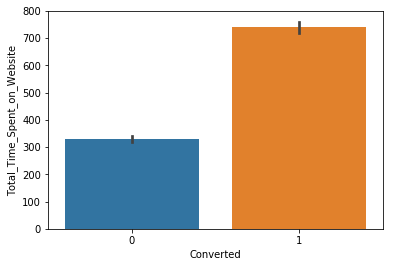

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=lead['Converted'],y=lead['Total_Time_Spent_on_Website']) ##As there is good amount of variance so this variable can be a good predictor

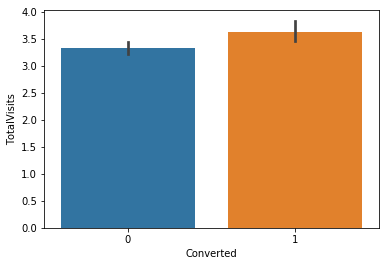

In [40]:
sns.barplot(x=lead['Converted'],y=lead['TotalVisits'])  ##As there is no significant variance so this variable may not be good predicto

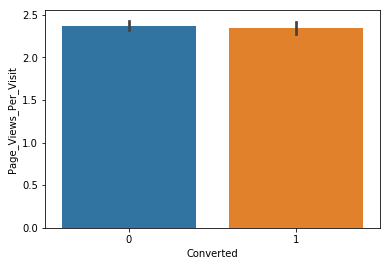

In [41]:
sns.barplot(x=lead['Converted'],y=lead['Page_Views_Per_Visit']) ##As there is no significant variance so this variable may not be good predictor

### Categorical Variables Plots

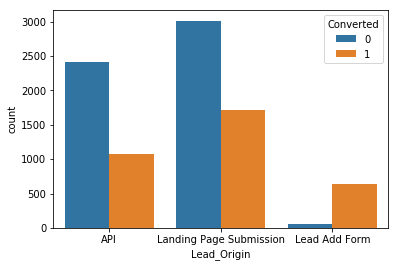

In [42]:
sns.countplot(x='Lead_Origin', hue='Converted', data=lead)

<Figure size 1080x288 with 0 Axes>

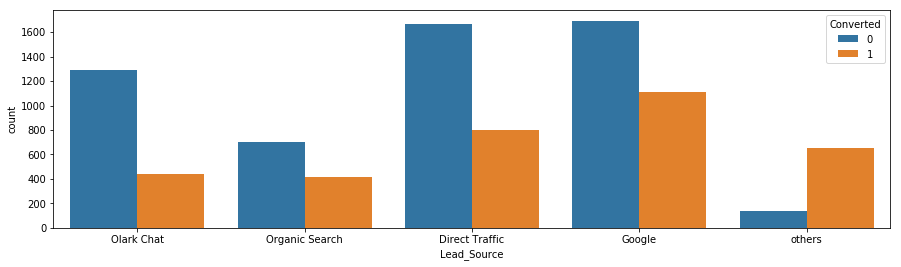

In [43]:
plt.figure(figsize=(15,4))
sns.countplot(x='Lead_Source', hue='Converted', data=lead)

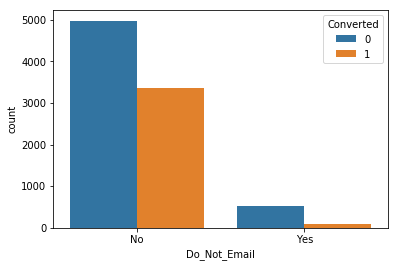

In [44]:
sns.countplot(x='Do_Not_Email', hue='Converted', data=lead)

<Figure size 1080x288 with 0 Axes>

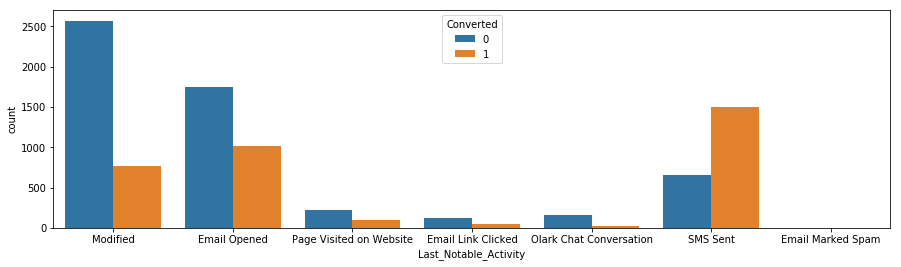

In [45]:
plt.figure(figsize=(15,4))
sns.countplot(x='Last_Notable_Activity', hue='Converted', data=lead)

<Figure size 1080x288 with 0 Axes>

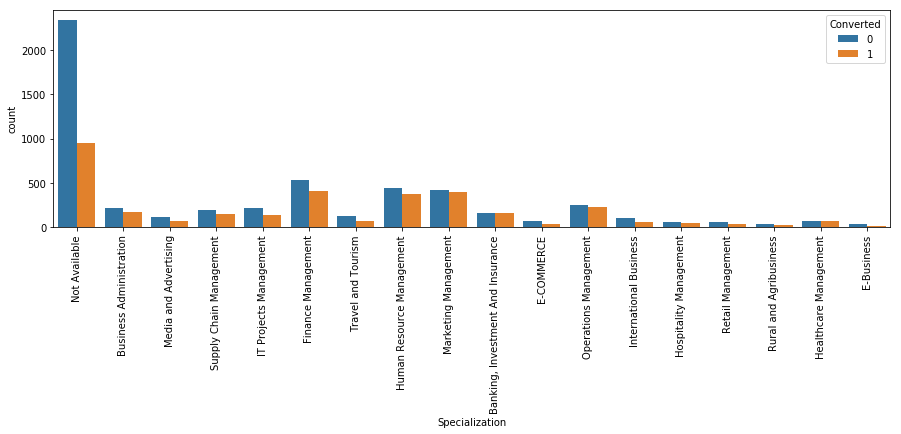

In [46]:
plt.figure(figsize=(15,4))
plott=sns.countplot(x='Specialization', hue='Converted', data=lead)
for item in plott.get_xticklabels():
    item.set_rotation(90)

<Figure size 720x288 with 0 Axes>

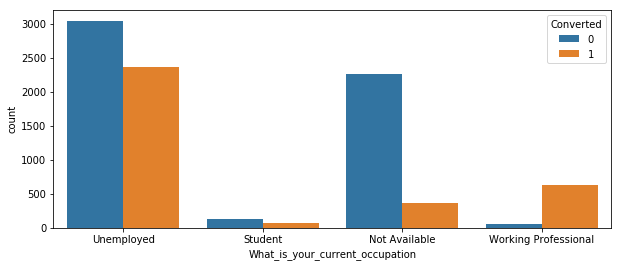

In [47]:
plt.figure(figsize=(10,4))
sns.countplot(x='What_is_your_current_occupation', hue='Converted', data=lead)

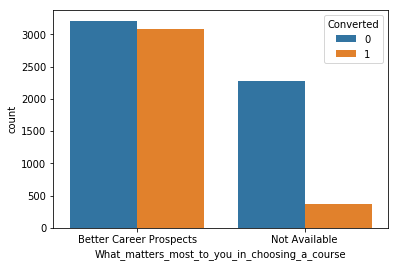

In [48]:
sns.countplot(x='What_matters_most_to_you_in_choosing_a_course', hue='Converted', data=lead)

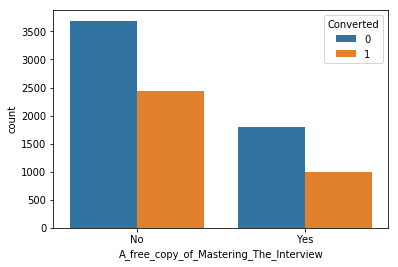

In [49]:
sns.countplot(x='A_free_copy_of_Mastering_The_Interview', hue='Converted', data=lead)

In [50]:
numeric=lead[['TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit
count,8818.00,8927.00,8818.00
mean,3.44,487.51,2.36
std,4.89,548.22,2.16
min,0.00,0.00,0.00
25%,1.00,11.00,1.00
50%,3.00,247.00,2.00
75%,5.00,938.00,3.00
90%,7.00,1379.00,5.00
99%,17.00,1840.74,9.00
max,251.00,2272.00,55.00


<Figure size 1080x360 with 0 Axes>

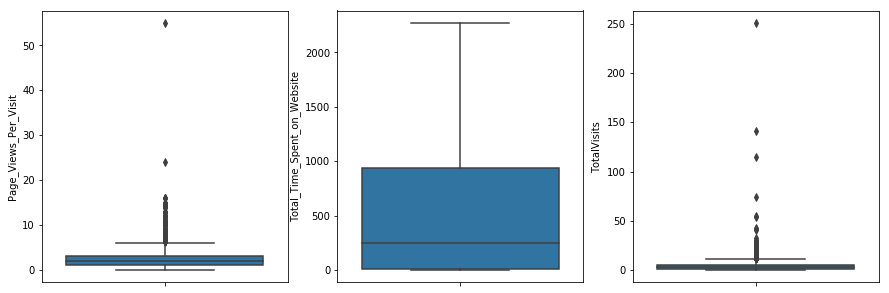

In [51]:

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(y='Page_Views_Per_Visit', data=numeric)
plt.subplot(1,3,2)
sns.boxplot(y='Total_Time_Spent_on_Website', data=numeric)
plt.subplot(1,3,3)
sns.boxplot(y='TotalVisits', data=numeric)
plt.show()

In [52]:
##checking the nulls 
print(((lead.isnull().sum()/len(lead))*100).sort_values(ascending=False),'%')

TotalVisits                                     1.22
Page_Views_Per_Visit                            1.22
Lead_Source                                     0.36
Last_Notable_Activity                           0.00
Country                                         0.00
Lead_Origin                                     0.00
Do_Not_Email                                    0.00
Converted                                       0.00
Total_Time_Spent_on_Website                     0.00
Specialization                                  0.00
A_free_copy_of_Mastering_The_Interview          0.00
What_is_your_current_occupation                 0.00
What_matters_most_to_you_in_choosing_a_course   0.00
Magazine                                        0.00
Receive_More_Updates_About_Our_Courses          0.00
Update_me_on_Supply_Chain_Content               0.00
Get_updates_on_DM_Content                       0.00
I_agree_to_pay_the_amount_through_cheque        0.00
Prospect_ID                                   

In [53]:
## Let us drop the remaining rows with nulls
lead.dropna(axis=0, inplace=True)

In [54]:
print(lead.shape)
print(lead.info())

(8792, 19)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8792 entries, 0 to 9239
Data columns (total 19 columns):
Prospect_ID                                      8792 non-null object
Lead_Origin                                      8792 non-null object
Lead_Source                                      8792 non-null object
Do_Not_Email                                     8792 non-null object
Converted                                        8792 non-null int64
TotalVisits                                      8792 non-null float64
Total_Time_Spent_on_Website                      8792 non-null int64
Page_Views_Per_Visit                             8792 non-null float64
Country                                          8792 non-null object
Specialization                                   8792 non-null object
What_is_your_current_occupation                  8792 non-null object
What_matters_most_to_you_in_choosing_a_course    8792 non-null object
Magazine                                  

## Step 4: Data Preparation

#### Feature Scaling

In [55]:
cols = ["TotalVisits","Total_Time_Spent_on_Website","Page_Views_Per_Visit"]

In [56]:
#normalization
for i in cols:
    print(i)
    lead[i] = (lead[i]-min(lead[i]))/(max(lead[i])-min(lead[i]))

TotalVisits
Total_Time_Spent_on_Website
Page_Views_Per_Visit


#### Creating Dummy Variables

In [57]:
##Dropped those dummy variables, for which either created category or "not declared"
lead['Lead_Origin'].value_counts()
origin=pd.get_dummies(lead['Lead_Origin'],prefix='orgn')
origin=origin.drop('orgn_Lead Add Form', axis=1)

lead['Lead_Source'].value_counts()
source=pd.get_dummies(lead['Lead_Source'],prefix='src')
source=source.drop('src_others', axis=1)

lead['Do_Not_Email'].value_counts()
DNE=pd.get_dummies(lead['Do_Not_Email'],drop_first=True, prefix='dne')

lead['Specialization'].value_counts()
spcial=pd.get_dummies(lead['Specialization'],prefix='spcl')
spcial=spcial.drop('spcl_Not Available', axis=1)

lead['What_is_your_current_occupation'].value_counts()
occupation=pd.get_dummies(lead['What_is_your_current_occupation'],prefix='occ')
occupation=occupation.drop('occ_Not Available', axis=1)

lead['What_matters_most_to_you_in_choosing_a_course'].value_counts()
what=pd.get_dummies(lead['What_is_your_current_occupation'],prefix='what')
what=what.drop('what_Not Available', axis=1)

lead['A_free_copy_of_Mastering_The_Interview'].value_counts()
intrvw=pd.get_dummies(lead['A_free_copy_of_Mastering_The_Interview'],prefix='intrvw',drop_first=True)

lead['Last_Notable_Activity'].value_counts()
last_note=pd.get_dummies(lead['Last_Notable_Activity'],prefix='last_note')
last_note=last_note.drop('last_note_Email Link Clicked', axis=1)

lead['Country'].value_counts()
cntry=pd.get_dummies(lead['Country'],prefix='country')
cntry=cntry.drop('country_Not Available', axis=1)

Landing Page Submission    4726
API                        3500
Lead Add Form              566 
Name: Lead_Origin, dtype: int64

Google            2803
Direct Traffic    2461
Olark Chat        1727
Organic Search    1119
others            682 
Name: Lead_Source, dtype: int64

No     8197
Yes    595 
Name: Do_Not_Email, dtype: int64

Not Available                        3210
Finance Management                   931 
Human Resource Management            814 
Marketing Management                 802 
Operations Management                485 
Business Administration              383 
IT Projects Management               359 
Supply Chain Management              335 
Banking, Investment And Insurance    330 
Travel and Tourism                   196 
Media and Advertising                192 
International Business               171 
Healthcare Management                150 
Hospitality Management               107 
E-COMMERCE                           106 
Retail Management                    95  
Rural and Agribusiness               71  
E-Business                           55  
Name: Specialization, dtype: int64

Unemployed              5309
Not Available           2621
Working Professional    659 
Student                 203 
Name: What_is_your_current_occupation, dtype: int64

Better Career Prospects    6154
Not Available              2638
Name: What_matters_most_to_you_in_choosing_a_course, dtype: int64

No     5999
Yes    2793
Name: A_free_copy_of_Mastering_The_Interview, dtype: int64

Modified                   3221
Email Opened               2768
SMS Sent                   2139
Page Visited on Website    310 
Olark Chat Conversation    182 
Email Link Clicked         170 
Email Marked Spam          2   
Name: Last_Notable_Activity, dtype: int64

India            6285
Not Available    2229
Outside India    278 
Name: Country, dtype: int64

In [58]:
leadn=lead.drop(columns=['Prospect_ID'], axis=1)
leadncol=['Converted','TotalVisits','Total_Time_Spent_on_Website','Page_Views_Per_Visit']
final=pd.concat([leadn[leadncol],origin,source,DNE,spcial,occupation,what,intrvw,last_note,cntry], axis=1)
final.shape

(8792, 43)

In [59]:
final.head()

,Converted,TotalVisits,Total_Time_Spent_on_Website,Page_Views_Per_Visit,orgn_API,orgn_Landing Page Submission,src_Direct Traffic,src_Google,src_Olark Chat,src_Organic Search,dne_Yes,"spcl_Banking, Investment And Insurance",spcl_Business Administration,spcl_E-Business,spcl_E-COMMERCE,spcl_Finance Management,spcl_Healthcare Management,spcl_Hospitality Management,spcl_Human Resource Management,spcl_IT Projects Management,spcl_International Business,spcl_Marketing Management,spcl_Media and Advertising,spcl_Operations Management,spcl_Retail Management,spcl_Rural and Agribusiness,spcl_Supply Chain Management,spcl_Travel and Tourism,occ_Student,occ_Unemployed,occ_Working Professional,what_Student,what_Unemployed,what_Working Professional,intrvw_Yes,last_note_Email Marked Spam,last_note_Email Opened,last_note_Modified,last_note_Olark Chat Conversation,last_note_Page Visited on Website,last_note_SMS Sent,country_India,country_Outside India
0,0,0.00,0.00,0.00,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0.02,0.30,0.05,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0
2,1,0.01,0.67,0.04,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0
3,0,0.00,0.13,0.02,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,1,0.01,0.63,0.02,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0


## Step 5: Model building

### Preprocessing Steps

#### Train and Test Split

In [60]:
from sklearn.model_selection import train_test_split
x=final.drop('Converted', axis=1)
y=final['Converted']

In [61]:
x_train, x_test, y_train, y_test=train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=1000)

#### Analysing Co relation

<Figure size 2160x2160 with 0 Axes>

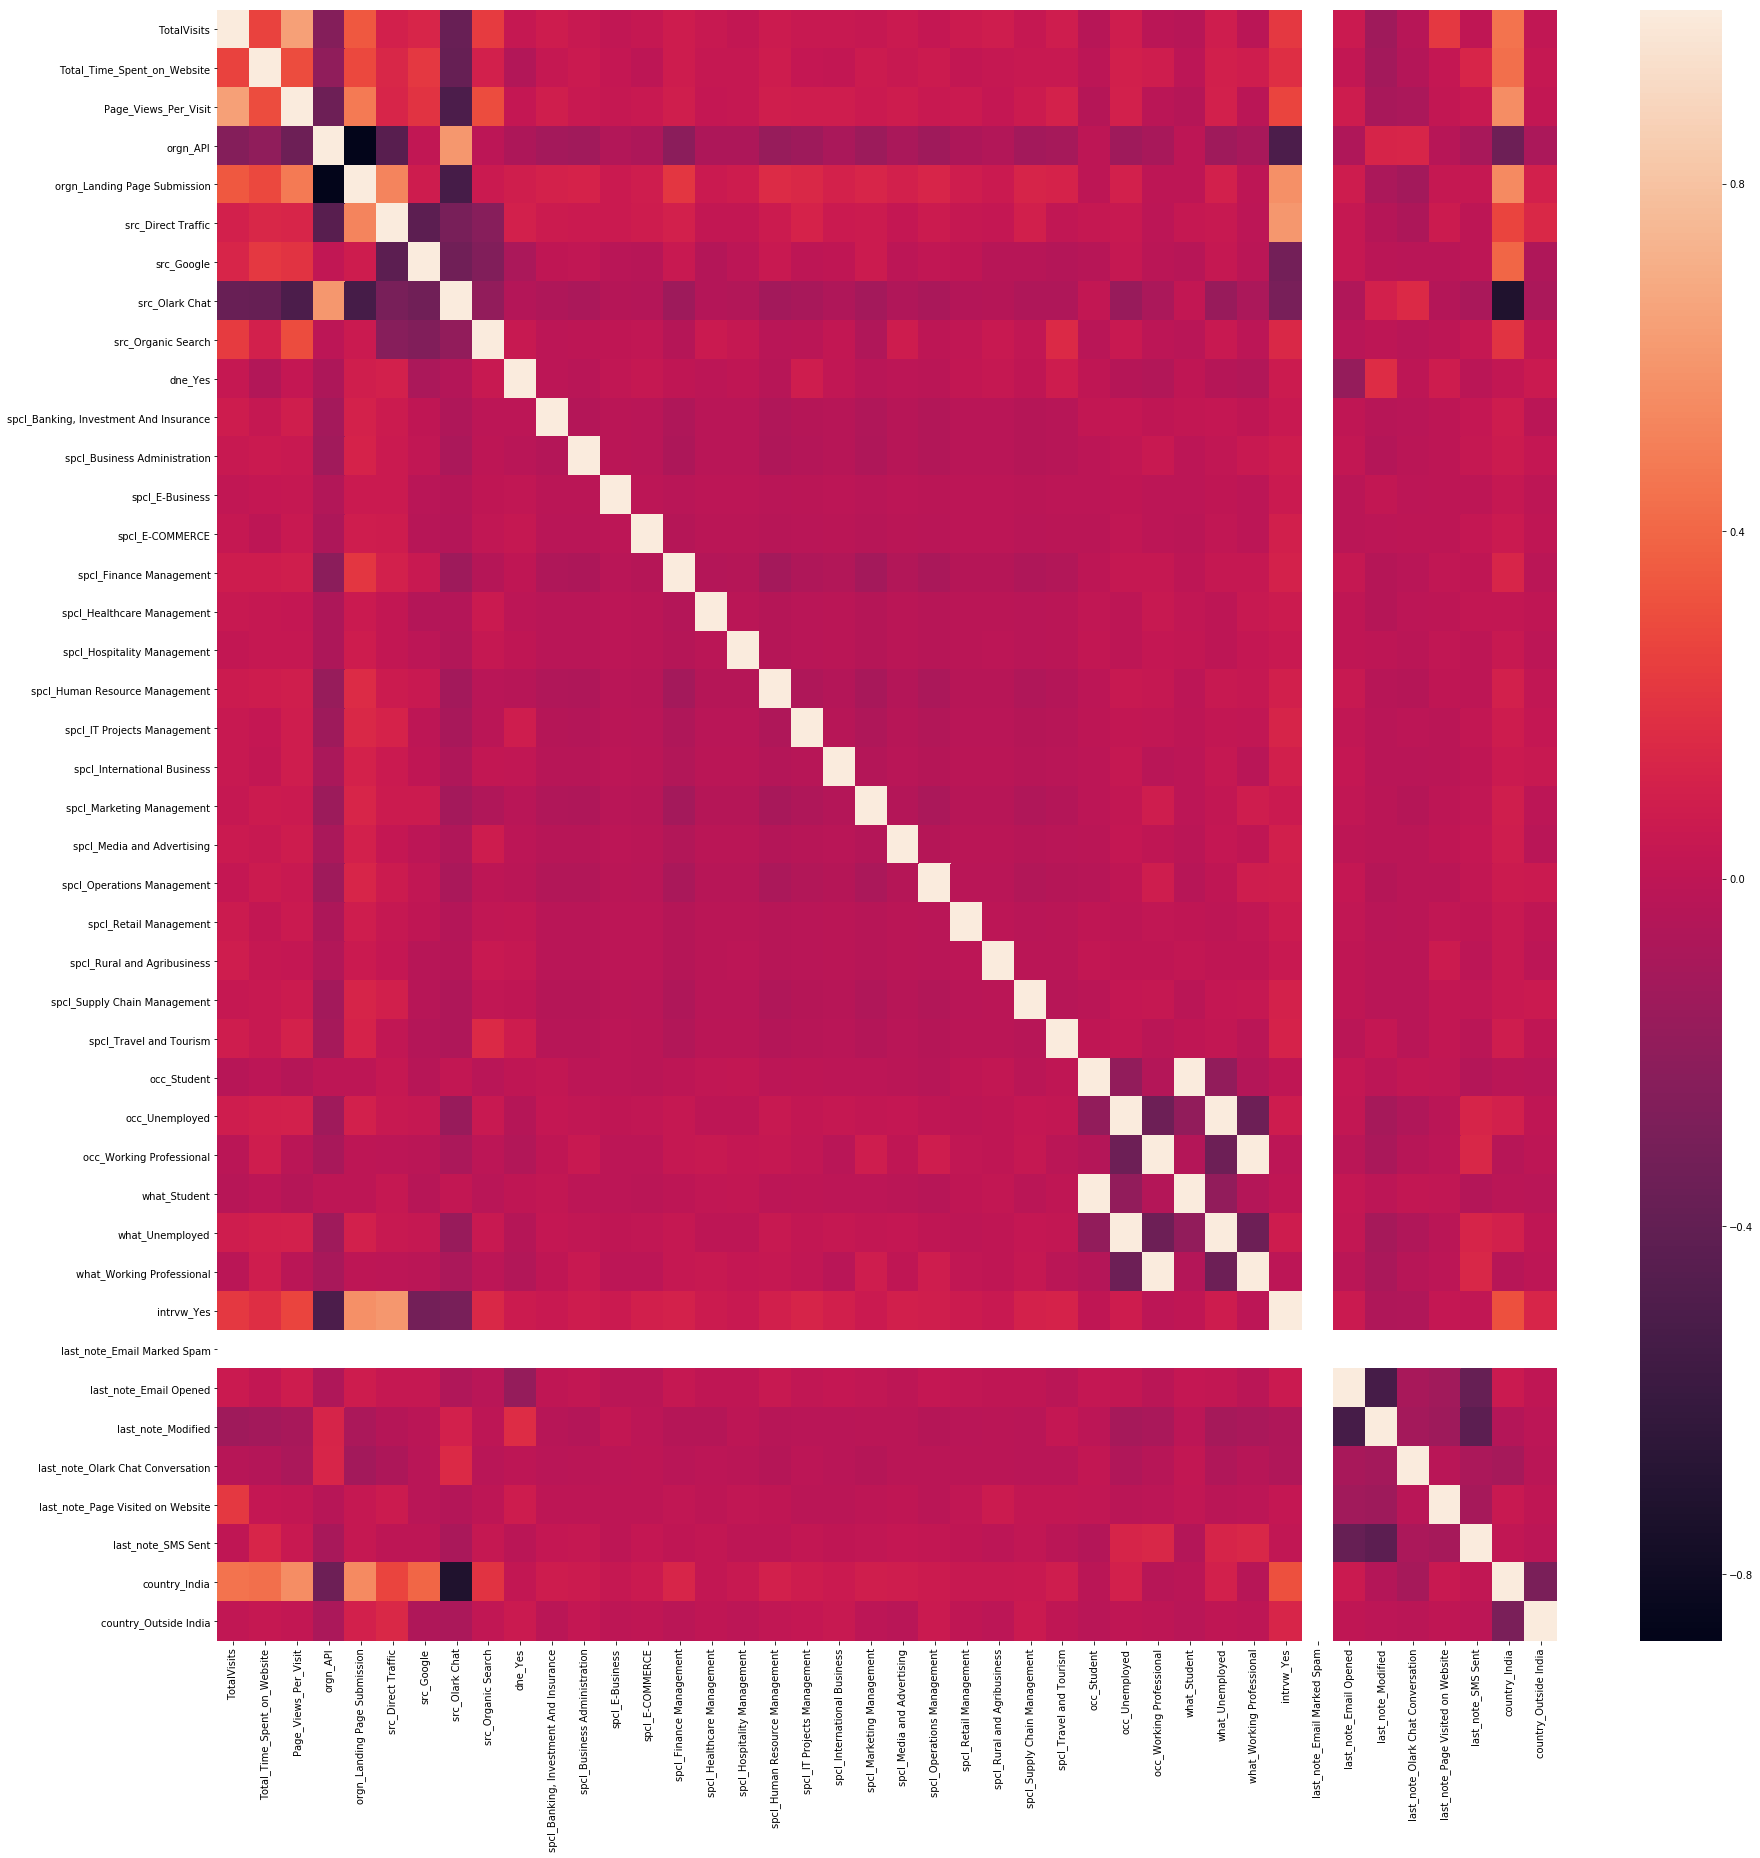

In [62]:
##to chekc the correlation among varibles
plt.figure(figsize=(30,30))
sns.heatmap(x_train.corr())

#### Feature Selection Using RFE

In [63]:
## There are in all 43 variables so we plan to use the RFE technique to get only 
# the 30 most important varibles
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)   
rfe = rfe.fit(x,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True  True  True  True  True False False False False  True  True  True
  True  True  True  True False  True  True  True  True  True  True False
  True  True  True  True  True  True False False  True False False False
  True  True False  True  True  True]
[ 1  1  1  1  1  6 11 10  9  1  1  1  1  1  1  1 12  1  1  1  1  1  1  5
  1  1  1  1  1  1  3  2  1 13  4  7  1  1  8  1  1  1]


In [64]:
## The Top 30 variables chosen by RFE analysis
df=pd.DataFrame(list(x))
dfs=pd.DataFrame(rfe.support_)
dfs.rename(columns={0:'sup'}, inplace=True)
dffs=pd.concat([df,dfs], axis=1)
cols=list(dffs[dffs['sup']==True][0])
cols

['TotalVisits',
 'Total_Time_Spent_on_Website',
 'Page_Views_Per_Visit',
 'orgn_API',
 'orgn_Landing Page Submission',
 'dne_Yes',
 'spcl_Banking, Investment And Insurance',
 'spcl_Business Administration',
 'spcl_E-Business',
 'spcl_E-COMMERCE',
 'spcl_Finance Management',
 'spcl_Healthcare Management',
 'spcl_Human Resource Management',
 'spcl_IT Projects Management',
 'spcl_International Business',
 'spcl_Marketing Management',
 'spcl_Media and Advertising',
 'spcl_Operations Management',
 'spcl_Rural and Agribusiness',
 'spcl_Supply Chain Management',
 'spcl_Travel and Tourism',
 'occ_Student',
 'occ_Unemployed',
 'occ_Working Professional',
 'what_Working Professional',
 'last_note_Modified',
 'last_note_Olark Chat Conversation',
 'last_note_SMS Sent',
 'country_India',
 'country_Outside India']

#####  Correlation Insights

<Figure size 720x432 with 0 Axes>

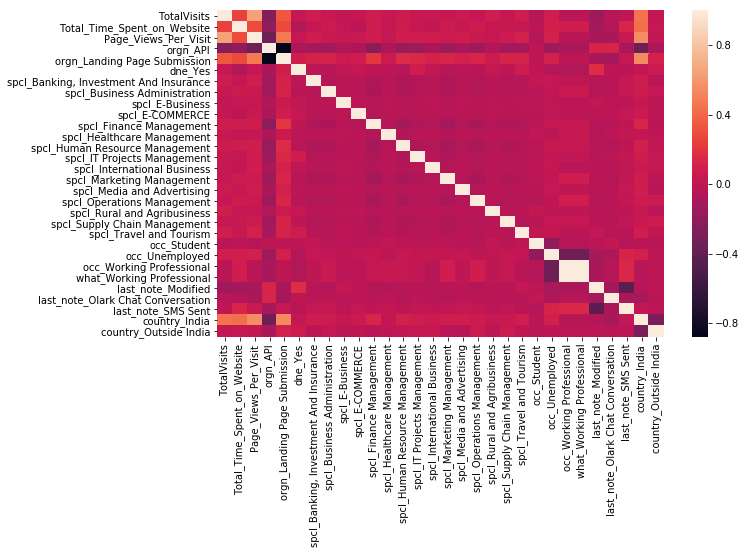

In [65]:
plt.figure(figsize=(10,6))
sns.heatmap(x_train[cols].corr())

So now we will analyse the p-value and VIF value of various varaibles and remove the highly collinear and insignificant variables   

In [66]:
# Let's do the first run
cols = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','orgn_API', 'orgn_Landing Page Submission',
         'dne_Yes', 'spcl_Banking, Investment And Insurance', 'spcl_Business Administration', 'spcl_E-Business',
         'spcl_E-COMMERCE','spcl_Finance Management', 'spcl_Healthcare Management', 'spcl_Human Resource Management', 
         'spcl_IT Projects Management', 'spcl_International Business','spcl_Marketing Management', 'spcl_Media and Advertising',
         'spcl_Operations Management', 'spcl_Rural and Agribusiness','spcl_Supply Chain Management', 'spcl_Travel and Tourism',
         'occ_Student', 'occ_Unemployed', 'occ_Working Professional', 'what_Working Professional', 'last_note_Modified', 
         'last_note_Olark Chat Conversation', 'last_note_SMS Sent', 'country_India', 'country_Outside India']

import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train[cols]), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6154
Model:                            GLM   Df Residuals:                     6124
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2444.4
Date:                Mon, 10 Jun 2019   Deviance:                       4888.9
Time:                        23:01:04   Pearson chi2:                 6.17e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.7559      0.244      3.092      0.002       0.277       1.235
TotalVisits                               10.3453      2.701      3.831      0.000       5.052      15.639
Total_Time_Spent_on_Website                4.8156      0.177     27.197      0.000       4.469       5.163
Page_Views_Per_Visit                      -4.2472      1.368     -3.106      0.002      -6.928      -1.567
orgn_API                                  -2.8596      0.237    -12.066      0.000      -3.324      -2.395
orgn_Landing Page Submission              -3.7204      0.258    -14.441      0.000      -4.225      -3.216
dne_Yes                                   -1.5580      0.208     -7.502      0.000      -1.965      -1.151
spcl_Banking, Investment And Insurance     1.4322      0.207      6.918      0.000       1.026       1.838
spcl_Business Administration               0.8482      0.207      4.101      0.000       0.443       1.254
spcl_E-Business                            0.9051      0.479      1.888      0.059      -0.034       1.844
spcl_E-COMMERCE                            1.0992      0.364      3.021      0.003       0.386       1.812
spcl_Finance Management                    0.9011      0.156      5.770      0.000       0.595       1.207
spcl_Healthcare Management                 0.9508      0.313      3.037      0.002       0.337       1.564
spcl_Human Resource Management             0.9413      0.159      5.927      0.000       0.630       1.253
spcl_IT Projects Management                1.0708      0.217      4.934      0.000       0.645       1.496
spcl_International Business                0.7691      0.269      2.857      0.004       0.241       1.297
spcl_Marketing Management                  1.1071      0.157      7.065      0.000       0.800       1.414
spcl_Media and Advertising                 0.7475      0.262      2.853      0.004       0.234       1.261
spcl_Operations Management                 0.9589      0.183      5.233      0.000       0.600       1.318
spcl_Rural and Agribusiness                0.8517      0.391      2.176      0.030       0.085       1.619
spcl_Supply Chain Management               0.8727      0.215      4.068      0.000       0.452       1.293
spcl_Travel and Tourism                    1.1736      0.265      4.423      0.000       0.654       1.694
occ_Student                                1.0322      0.240      4.310      0.000       0.563       1.502
occ_Unemployed                             1.0784      0.092     11.731      0.000       0.898       1.259
occ_Working Professional                   1.7534      0.105     16.766      0.000       1.548       1.958
what_Working Professional                  1.7534      0.105     16.766      0.000       1.548       1.958
last_note_Modified                        -0.5499      0.08

In [67]:
cols= ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','orgn_API', 'orgn_Landing Page Submission',
         'dne_Yes', 'spcl_Banking, Investment And Insurance', 'spcl_Business Administration',
         'spcl_E-COMMERCE','spcl_Finance Management', 'spcl_Healthcare Management', 'spcl_Human Resource Management', 
         'spcl_IT Projects Management', 'spcl_International Business','spcl_Marketing Management', 'spcl_Media and Advertising',
         'spcl_Operations Management', 'spcl_Rural and Agribusiness','spcl_Supply Chain Management', 'spcl_Travel and Tourism',
         'occ_Student', 'occ_Unemployed', 'occ_Working Professional', 'what_Working Professional', 'last_note_Modified', 
         'last_note_Olark Chat Conversation', 'last_note_SMS Sent', 'country_India', 'country_Outside India']

# spcl_E-Business has p-Value > 0.5, so dropping it 

import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train[cols]), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6154
Model:                            GLM   Df Residuals:                     6125
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2446.2
Date:                Mon, 10 Jun 2019   Deviance:                       4892.3
Time:                        23:01:04   Pearson chi2:                 6.19e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.7757      0.244      3.178      0.001       0.297       1.254
TotalVisits                               10.2785      2.699      3.809      0.000       4.989      15.568
Total_Time_Spent_on_Website                4.8239      0.177     27.241      0.000       4.477       5.171
Page_Views_Per_Visit                      -4.1967      1.365     -3.075      0.002      -6.872      -1.521
orgn_API                                  -2.8737      0.237    -12.141      0.000      -3.338      -2.410
orgn_Landing Page Submission              -3.6975      0.257    -14.395      0.000      -4.201      -3.194
dne_Yes                                   -1.5612      0.208     -7.513      0.000      -1.969      -1.154
spcl_Banking, Investment And Insurance     1.3863      0.205      6.752      0.000       0.984       1.789
spcl_Business Administration               0.8022      0.205      3.909      0.000       0.400       1.204
spcl_E-COMMERCE                            1.0514      0.363      2.899      0.004       0.340       1.762
spcl_Finance Management                    0.8537      0.154      5.547      0.000       0.552       1.155
spcl_Healthcare Management                 0.9052      0.312      2.902      0.004       0.294       1.516
spcl_Human Resource Management             0.8954      0.157      5.715      0.000       0.588       1.202
spcl_IT Projects Management                1.0233      0.215      4.751      0.000       0.601       1.445
spcl_International Business                0.7225      0.268      2.698      0.007       0.198       1.247
spcl_Marketing Management                  1.0636      0.155      6.873      0.000       0.760       1.367
spcl_Media and Advertising                 0.7006      0.261      2.687      0.007       0.189       1.212
spcl_Operations Management                 0.9140      0.181      5.036      0.000       0.558       1.270
spcl_Rural and Agribusiness                0.8087      0.390      2.072      0.038       0.044       1.574
spcl_Supply Chain Management               0.8263      0.213      3.881      0.000       0.409       1.244
spcl_Travel and Tourism                    1.1244      0.264      4.261      0.000       0.607       1.642
occ_Student                                1.0257      0.239      4.287      0.000       0.557       1.495
occ_Unemployed                             1.0761      0.092     11.718      0.000       0.896       1.256
occ_Working Professional                   1.7543      0.105     16.783      0.000       1.549       1.959
what_Working Professional                  1.7543      0.105     16.783      0.000       1.549       1.959
last_note_Modified                        -0.5475      0.088     -6.227      0.000      -0.720      -0.375
last_note_Olark Chat Conversation         -0.8920      0.31

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i) for i in range(x_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
23,what_Working Professional,inf
22,occ_Working Professional,inf
27,country_India,9.40
4,orgn_Landing Page Submission,9.37
2,Page_Views_Per_Visit,4.65
3,orgn_API,3.25
0,TotalVisits,3.06
21,occ_Unemployed,2.92
1,Total_Time_Spent_on_Website,2.38
24,last_note_Modified,2.03


In [70]:
cols = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','orgn_API', 'orgn_Landing Page Submission',
         'dne_Yes', 'spcl_Banking, Investment And Insurance', 'spcl_Business Administration',
         'spcl_E-COMMERCE','spcl_Finance Management', 'spcl_Healthcare Management', 'spcl_Human Resource Management', 
         'spcl_IT Projects Management', 'spcl_International Business','spcl_Marketing Management', 'spcl_Media and Advertising',
         'spcl_Operations Management', 'spcl_Rural and Agribusiness','spcl_Supply Chain Management', 'spcl_Travel and Tourism',
         'occ_Student', 'occ_Unemployed', 'occ_Working Professional',  'last_note_Modified', 
         'last_note_Olark Chat Conversation', 'last_note_SMS Sent', 'country_India', 'country_Outside India']

# The VIF value of 'what_Working Professional' is high let's drop it

import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train[cols]), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6154
Model:                            GLM   Df Residuals:                     6125
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2446.2
Date:                Mon, 10 Jun 2019   Deviance:                       4892.3
Time:                        23:01:04   Pearson chi2:                 6.19e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.7757      0.244      3.178      0.001       0.297       1.254
TotalVisits                               10.2785      2.699      3.809      0.000       4.989      15.568
Total_Time_Spent_on_Website                4.8239      0.177     27.241      0.000       4.477       5.171
Page_Views_Per_Visit                      -4.1967      1.365     -3.075      0.002      -6.872      -1.521
orgn_API                                  -2.8737      0.237    -12.141      0.000      -3.338      -2.410
orgn_Landing Page Submission              -3.6975      0.257    -14.395      0.000      -4.201      -3.194
dne_Yes                                   -1.5612      0.208     -7.513      0.000      -1.969      -1.154
spcl_Banking, Investment And Insurance     1.3863      0.205      6.752      0.000       0.984       1.789
spcl_Business Administration               0.8022      0.205      3.909      0.000       0.400       1.204
spcl_E-COMMERCE                            1.0514      0.363      2.899      0.004       0.340       1.762
spcl_Finance Management                    0.8537      0.154      5.547      0.000       0.552       1.155
spcl_Healthcare Management                 0.9052      0.312      2.902      0.004       0.294       1.516
spcl_Human Resource Management             0.8954      0.157      5.715      0.000       0.588       1.202
spcl_IT Projects Management                1.0233      0.215      4.751      0.000       0.601       1.445
spcl_International Business                0.7225      0.268      2.698      0.007       0.198       1.247
spcl_Marketing Management                  1.0636      0.155      6.873      0.000       0.760       1.367
spcl_Media and Advertising                 0.7006      0.261      2.687      0.007       0.189       1.212
spcl_Operations Management                 0.9140      0.181      5.036      0.000       0.558       1.270
spcl_Rural and Agribusiness                0.8087      0.390      2.072      0.038       0.044       1.574
spcl_Supply Chain Management               0.8263      0.213      3.881      0.000       0.409       1.244
spcl_Travel and Tourism                    1.1244      0.264      4.261      0.000       0.607       1.642
occ_Student                                1.0257      0.239      4.287      0.000       0.557       1.495
occ_Unemployed                             1.0761      0.092     11.718      0.000       0.896       1.256
occ_Working Professional                   3.5086      0.209     16.783      0.000       3.099       3.918
last_note_Modified                        -0.5475      0.088     -6.227      0.000      -0.720      -0.375
last_note_Olark Chat Conversation         -0.8920      0.319     -2.794      0.005      -1.518      -0.266
last_note_SMS Sent                         1.5464      0.09

In [71]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i) for i in range(x_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
26,country_India,9.40
4,orgn_Landing Page Submission,9.37
2,Page_Views_Per_Visit,4.65
3,orgn_API,3.25
0,TotalVisits,3.06
21,occ_Unemployed,2.92
1,Total_Time_Spent_on_Website,2.38
23,last_note_Modified,2.03
9,spcl_Finance Management,1.82
25,last_note_SMS Sent,1.65


In [72]:
cols = ['TotalVisits', 'Total_Time_Spent_on_Website', 'Page_Views_Per_Visit','orgn_API', 'orgn_Landing Page Submission',
         'dne_Yes', 'spcl_Banking, Investment And Insurance', 'spcl_Business Administration',
         'spcl_E-COMMERCE','spcl_Finance Management', 'spcl_Healthcare Management', 'spcl_Human Resource Management', 
         'spcl_IT Projects Management', 'spcl_International Business','spcl_Marketing Management', 'spcl_Media and Advertising',
         'spcl_Operations Management', 'spcl_Rural and Agribusiness','spcl_Supply Chain Management', 'spcl_Travel and Tourism',
         'occ_Student', 'occ_Unemployed', 'occ_Working Professional',  'last_note_Modified', 
         'last_note_Olark Chat Conversation', 'last_note_SMS Sent', 'country_Outside India']

#country_India has high VIF so dropping 'country_India',

import statsmodels.api as sm
logm1=sm.GLM(y_train,sm.add_constant(x_train[cols]), family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6154
Model:                            GLM   Df Residuals:                     6126
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2480.1
Date:                Mon, 10 Jun 2019   Deviance:                       4960.2
Time:                        23:01:05   Pearson chi2:                 6.12e+03
No. Iterations:                     6   Covariance Type:             nonrobust
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.8267      0.244      3.394      0.001       0.349       1.304
TotalVisits                                8.0755      2.626      3.075      0.002       2.928      13.223
Total_Time_Spent_on_Website                4.3450      0.163     26.685      0.000       4.026       4.664
Page_Views_Per_Visit                      -7.4313      1.308     -5.679      0.000      -9.996      -4.867
orgn_API                                  -3.3078      0.232    -14.268      0.000      -3.762      -2.853
orgn_Landing Page Submission              -4.3148      0.246    -17.533      0.000      -4.797      -3.832
dne_Yes                                   -1.5544      0.205     -7.589      0.000      -1.956      -1.153
spcl_Banking, Investment And Insurance     1.2878      0.201      6.405      0.000       0.894       1.682
spcl_Business Administration               0.6848      0.201      3.409      0.001       0.291       1.079
spcl_E-COMMERCE                            0.8995      0.358      2.515      0.012       0.198       1.601
spcl_Finance Management                    0.7362      0.150      4.909      0.000       0.442       1.030
spcl_Healthcare Management                 0.8204      0.307      2.671      0.008       0.218       1.422
spcl_Human Resource Management             0.7694      0.153      5.018      0.000       0.469       1.070
spcl_IT Projects Management                0.8892      0.210      4.229      0.000       0.477       1.301
spcl_International Business                0.5996      0.264      2.275      0.023       0.083       1.116
spcl_Marketing Management                  0.9349      0.152      6.165      0.000       0.638       1.232
spcl_Media and Advertising                 0.6049      0.254      2.378      0.017       0.106       1.103
spcl_Operations Management                 0.7808      0.177      4.408      0.000       0.434       1.128
spcl_Rural and Agribusiness                0.7702      0.381      2.023      0.043       0.024       1.517
spcl_Supply Chain Management               0.7539      0.208      3.617      0.000       0.345       1.162
spcl_Travel and Tourism                    1.0670      0.258      4.136      0.000       0.561       1.573
occ_Student                                1.0464      0.239      4.377      0.000       0.578       1.515
occ_Unemployed                             1.0541      0.091     11.523      0.000       0.875       1.233
occ_Working Professional                   3.4830      0.205     16.967      0.000       3.081       3.885
last_note_Modified                        -0.5669      0.087     -6.492      0.000      -0.738      -0.396
last_note_Olark Chat Conversation         -0.8027      0.323     -2.488      0.013      -1.435      -0.170
last_note_SMS Sent                         1.5422      0.09

In [73]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train[cols].columns
vif['VIF'] = [variance_inflation_factor(x_train[cols].values, i) for i in range(x_train[cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,orgn_Landing Page Submission,7.05
2,Page_Views_Per_Visit,4.33
0,TotalVisits,3.02
21,occ_Unemployed,2.92
3,orgn_API,2.57
1,Total_Time_Spent_on_Website,2.15
23,last_note_Modified,2.03
9,spcl_Finance Management,1.81
25,last_note_SMS Sent,1.65
11,spcl_Human Resource Management,1.63


### Predicting for the Train data Set

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logm2 = LogisticRegression()
logm2.fit(x_train[cols], y_train)
logm2.coef_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

array([[ 0.40315957,  4.12322772, -2.51458309, -3.0208466 , -3.97083839,
        -1.43628229,  1.10628733,  0.55276532,  0.65941773,  0.60936468,
         0.67490678,  0.64080318,  0.72966803,  0.41152272,  0.80755529,
         0.44339035,  0.65799294,  0.65280128,  0.59574418,  0.83389347,
         0.97764569,  1.03118804,  3.32484072, -0.56910844, -0.69021165,
         1.4777655 , -0.50378044]])

In [75]:
print(x_train[cols].shape)
print(x_test[cols].shape)


(6154, 27)
(2638, 27)


In [76]:
y_predict_train=logm2.predict_proba(x_train[cols])
y_predict_train=pd.DataFrame(y_predict_train)
y_predict_train = y_predict_train.iloc[:,[1]]

y_predict_train.values.reshape(-1)

array([0.94260136, 0.81256079, 0.15095388, ..., 0.58849719, 0.18321132,
       0.79884884])

In [77]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_predict_train.values.reshape(-1)})

#Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)


In [78]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [79]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3335  489]
 [ 661 1669]]


In [80]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.813129671758206


In [81]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [82]:
# Calculate the sensitivity

TP/(TP+FN)

0.7163090128755365

In [83]:
# Calculate the specificity

TN/(TN+FP)

0.8721234309623431

#### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [84]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

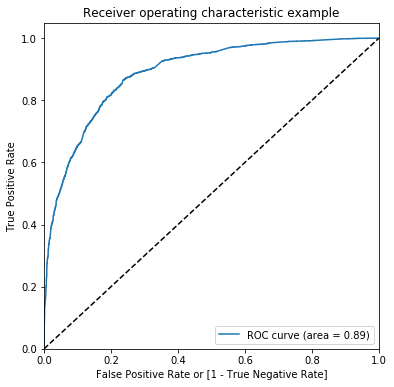

(array([0.        , 0.        , 0.        , ..., 0.99947699, 0.99973849,
        1.        ]),
 array([4.29184549e-04, 8.58369099e-04, 1.28755365e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([0.99855832, 0.99848895, 0.99801677, ..., 0.00375067, 0.003008  ,
        0.00289061]))

In [85]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Finding Optimal Cutoff Point

In [86]:
#Looking at the confusion matrix again

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.39 else 0)

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3142,  682],
       [ 473, 1857]])

##### Precision and Recall

##### Precision
TP / TP + FP

In [87]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7313903111461205

#### Recall
TP / TP + FN##

In [88]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7969957081545065

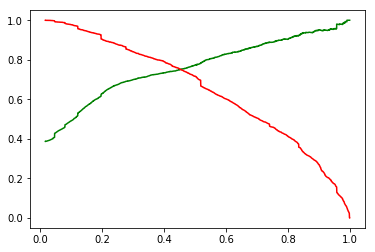

In [89]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

The optimal cutoff looks to be 0.5

### Prediction for Test Data set and Assigning Lead Score

In [100]:
# Prediction for test data
y_predict=logm2.predict_proba(x_test[cols])
y_predict=pd.DataFrame(y_predict)
y_predict = y_predict.iloc[:,[1]]
y_predict.rename(columns={1:'probability'}, inplace=True)
y_predict.index=y_test.index
y_prob=pd.concat([y_test,y_predict], axis=1)
y_prob['predicted']=y_prob['probability'].map(lambda x: 0 if x<0.5 else 1)

# Assigning Lead Score
lead_score_test = pd.DataFrame(logm2.predict_proba(x_test[cols]))
lead_score_train = pd.DataFrame(logm2.predict_proba(x_train[cols]))
lead_score = pd.concat([lead_score_train,lead_score_test])
lead_score = round(100*(lead_score.iloc[:,[1]]),0)
lead_score.rename(columns={1:'lead_score'}, inplace=True)
lead_score.head()
lead_score.shape

,lead_score
0,10.00
1,50.00
2,20.00
3,23.00
4,74.00


(8794, 1)

## Evaluating the Model

In [91]:
#to check the accuracy of the model
round(metrics.accuracy_score(y_prob.Converted, y_prob.predicted),2)

0.81

### ROC Curve

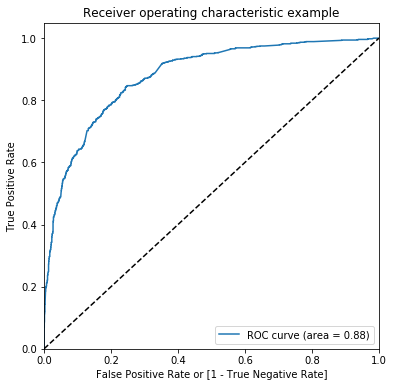

(array([0.        , 0.        , 0.        , ..., 0.99878345, 0.99939173,
        1.        ]),
 array([0.00100604, 0.00201207, 0.00503018, ..., 1.        , 1.        ,
        1.        ]),
 array([0.99883985, 0.99855851, 0.99848895, ..., 0.00590505, 0.00355264,
        0.0034748 ]))

In [92]:
##evaluating the model using ROC curve
##area under curve is 0.79 means the model is good to go

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

draw_roc(y_prob.Converted,y_prob.probability)

## Model Evaluation Metrics

### Confusion Matrix

In [93]:
confusion = metrics.confusion_matrix( y_prob.Converted, y_prob.predicted )
confusion

array([[1421,  223],
       [ 287,  707]])

In [94]:
tp= 1421 
fn= 223  
fp= 287
tn= 707

In [95]:
print('Accuracy                ---  ', round((tp+tn)*100/(tp+tn+fp+fn),2),'%')
print('Specificity             ---  ', round((tn)*100/(tn+fp),2),'%')
print('sensitivity/TPR/Recall  ---  ', round((tp)*100/(tp+fn),2),'%')
print('FPR                     ---  ', round((fp)*100/(tn+fp),2),'%')
print('Precision               ---  ', round((tp)*100/(tp+fp),2),'%')

Accuracy                ---   80.67 %
Specificity             ---   71.13 %
sensitivity/TPR/Recall  ---   86.44 %
FPR                     ---   28.87 %
Precision               ---   83.2 %
